In [19]:
import os
import mne

import matplotlib

# const
CLEAN_ROOT = "/mnt/d/work/eeg_smokers_data/clean"
SUBJECT = "S02"

In [20]:
# load
fif_file = f"{CLEAN_ROOT}/{SUBJECT}_clean.fif"
eeg_data = mne.io.read_raw_fif(fif_file, preload=True)

# psd
psd = eeg_data.compute_psd(method="welch", fmin=0.5, fmax=100, n_fft=2048)
psd_data, freqs = psd.get_data(return_freqs=True)

Opening raw data file /mnt/d/work/eeg_smokers_data/clean/S02_clean.fif...
    Range : 60000 ... 930039 =    120.000 ...  1860.078 secs
Ready.
Reading 0 ... 870039  =      0.000 ...  1740.078 secs...


/tmp/ipykernel_23480/1223539646.py:3: RuntimeWarning: This filename (/mnt/d/work/eeg_smokers_data/clean/S02_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_data = mne.io.read_raw_fif(fif_file, preload=True)


Effective window size : 4.096 (s)


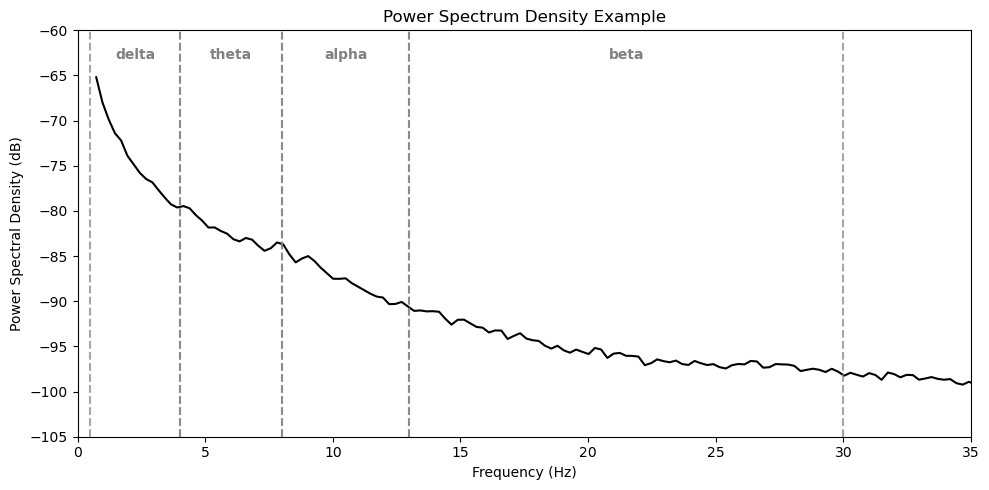

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))

# Average across channels
mean_psd = psd_data.mean(axis=0)
mean_psd_db = 10 * np.log10(mean_psd)

ax.plot(freqs, mean_psd_db, label="Mean PSD", color="black")

# Compute SEF90 (Spectral Edge Frequency 90%)
cumsum = np.cumsum(mean_psd)
cumsum /= cumsum[-1]
sef90_idx = np.searchsorted(cumsum, 0.9)
sef90_freq = freqs[sef90_idx]

# Set y-axis limit
ax.set_ylim(top=-60, bottom=-105)

# Frequency bands
bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
}

# Draw vertical dashed lines and labels
for band, (fmin, fmax) in bands.items():
    ax.axvline(fmin, color="grey", linestyle="--", alpha=0.7)
    ax.axvline(fmax, color="grey", linestyle="--", alpha=0.7)
    ax.text((fmin + fmax) / 2, ax.get_ylim()[1] - 2, band, color="grey", ha="center", va="top", fontsize=10, fontweight="bold")

ax.set_xlim([0, 35])
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power Spectral Density (dB)")
ax.set_title("Power Spectrum Density Example")
plt.tight_layout()
plt.show()

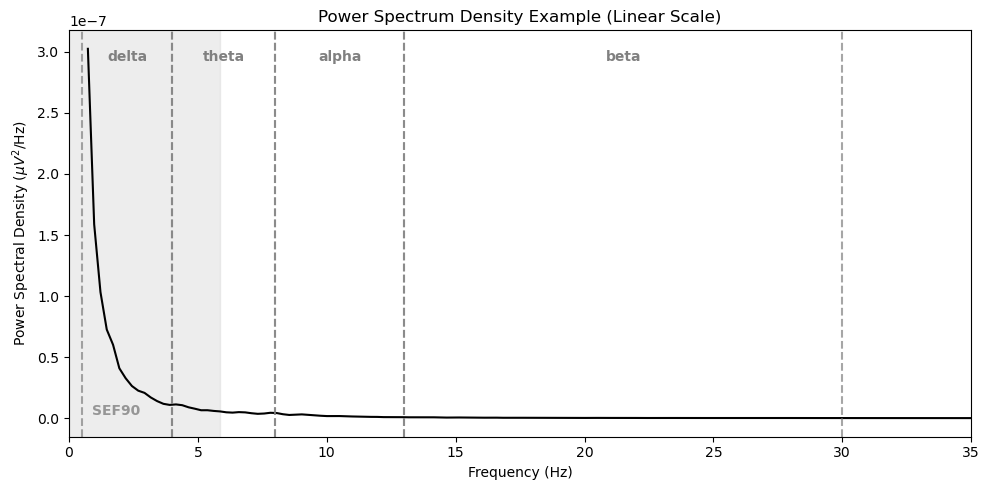

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))

# Average across channels (already linear)
mean_psd = psd_data.mean(axis=0)

ax.plot(freqs, mean_psd, label="Mean PSD (linear)", color="black")

# Compute SEF90 (Spectral Edge Frequency 90%)
cumsum = np.cumsum(mean_psd)
cumsum /= cumsum[-1]
sef90_idx = np.searchsorted(cumsum, 0.9)
sef90_freq = freqs[sef90_idx]

# Shade SEF90 region
ax.axvspan(0, sef90_freq, color="lightgrey", alpha=0.4, zorder=0)
ax.text(sef90_freq - 3.1, 0, "SEF90", color="grey", ha="right", va="bottom", fontsize=10, fontweight="bold", alpha=0.8)

# Frequency bands
bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
}

# Draw vertical dashed lines and labels
for band, (fmin, fmax) in bands.items():
    ax.axvline(fmin, color="grey", linestyle="--", alpha=0.7)
    ax.axvline(fmax, color="grey", linestyle="--", alpha=0.7)
    ax.text((fmin + fmax) / 2, ax.get_ylim()[1] * 0.95, band, color="grey", ha="center", va="top", fontsize=10, fontweight="bold")

ax.set_xlim([0, 35])
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel(r"Power Spectral Density ($\mu V^2/\mathrm{Hz}$)")
ax.set_title("Power Spectrum Density Example (Linear Scale)")
plt.tight_layout()
plt.show()